### AUTHOR : VAISHNAV KRISHNA P
#### TOPIC : US ELECTRICITY PRICES 
#### DATASET :https://www.kaggle.com/datasets/alistairking/electricity-prices?resource=download

#### DISCRIPTION ABOUT THE DATASET:
* This comprehensive dataset offers a detailed look at the United States electricity market, providing valuable insights into prices, sales, and revenue across various states, sectors, and years. With data spanning from 2001 onwards to 2024, this dataset is a powerful tool for analyzing the complex dynamics of the US electricity market and understanding how it has evolved over time.

* The dataset includes eight key variables:

1. year: The year of the observation
2. month: The month of the observation
3. stateDescription: The name of the state
4. sectorName: The sector of the electricity market (residential, commercial, industrial, other, or all sectors)
5. customers: The number of customers (missing for some observations)
6. price: The average price of electricity per kilowatt-hour (kWh) in cents
7. revenue: The total revenue generated from electricity sales in millions of dollars
6. sales: The total electricity sales in millions of kilowatt-hours (kWh)


In [1009]:
# Importing necessory libraries 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# ignoring unnecessory warnings
import warnings
warnings.filterwarnings(action='ignore')

# transformation 
from sklearn.preprocessing import StandardScaler 

# libraries for model 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Library for train test split 
from sklearn.model_selection import train_test_split

In [1010]:
# importing the dataset
df = pd.read_csv("clean_data.csv")

In [1011]:
# first five rows of the dataset 
df.head(10)

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
5,2001,1,New England,all sectors,NaN,10.73,1139.89520,10622.88375
6,2001,1,South Carolina,other,NaN,6.57,5.28332,80.41336
7,2001,1,South Carolina,residential,NaN,7.36,225.81673,3066.25911
8,2001,1,South Dakota,all sectors,NaN,5.85,46.98518,803.24177
9,2001,1,South Dakota,commercial,NaN,5.95,15.92044,267.66283


In [1012]:
# Lets, check the size of the dataset 
df.shape

(85870, 8)

* Dataset consists of 85870 rows and 8 columns 

### EDA 
1. Missing Value analysis 
2. Categorical features 
3. Continous Features 
4. Outlier Analysis 

#### MISSING VALUE ANALYSIS 

In [1013]:
# Missing value analysis
df.isna().sum(axis=0)

year                    0
month                   0
stateDescription        0
sectorName              0
customers           26040
price                   0
revenue                 0
sales                   0
dtype: int64

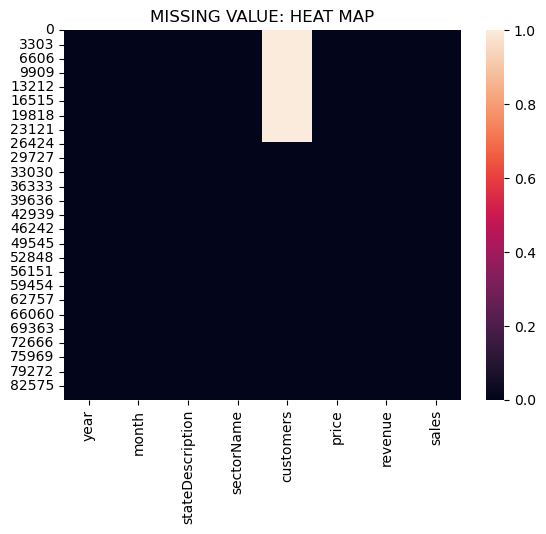

In [1014]:
# Visualisation of the Missing values 
plt.title("MISSING VALUE: HEAT MAP")
sns.heatmap(df.isna())
plt.show()

In [1015]:
# Lets understand how many percentage of values are missing in customers
df['customers'].isna().sum()/len(df) * 100

30.324909747292416

* There are 26,040(30.3%) missing vaules for customer features rest all the features are very clean 

In [1016]:
# checking whether there is any duplicated rows or not 
df.duplicated().sum()

0

In [1017]:
# datatypes of each features 
df.dtypes

year                  int64
month                 int64
stateDescription     object
sectorName           object
customers           float64
price               float64
revenue             float64
sales               float64
dtype: object

#### YEAR AND REVENUE

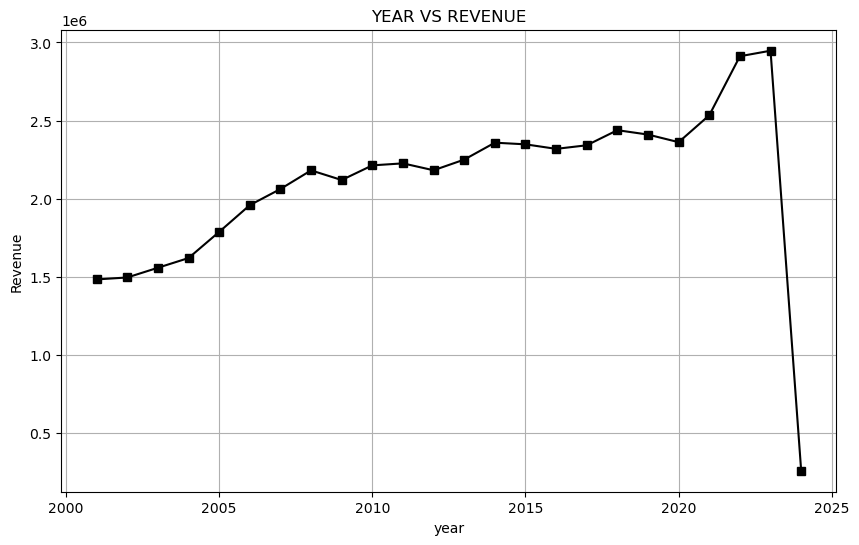

In [1018]:
# Line plot for analysing year and revenue
plt.figure(figsize=(10,6))
plt.title("YEAR VS REVENUE")
df.groupby("year")['revenue'].sum().plot(marker="s",color="k")
plt.grid(True)
plt.ylabel("Revenue")
plt.show()

* From the line plot it is observed that from 2000 - 2023 the revenue was increasing after that 2023-2024 the revenue declined a lot

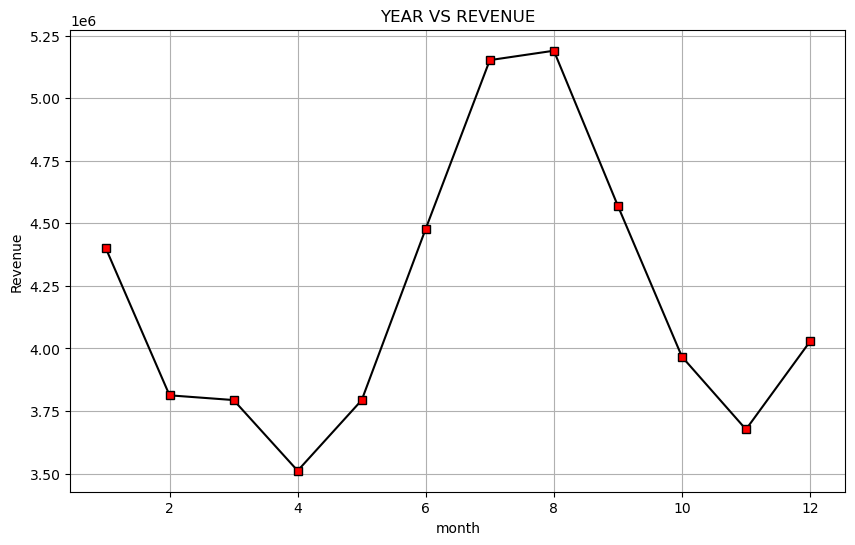

In [1019]:
# Line plot for analysing year and revenue
plt.figure(figsize=(10,6))
plt.title("YEAR VS REVENUE")
df.groupby("month")['revenue'].sum().plot(marker="s",color="k",markerfacecolor="r")
plt.grid(True)
plt.ylabel("Revenue")
plt.show()

* In over all,Months: june,july,augest,september have a high revenues.

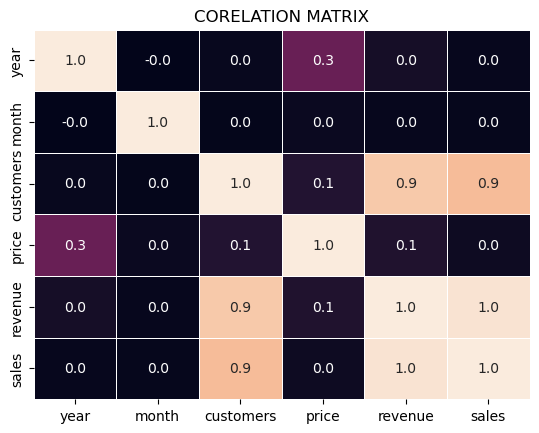

In [1020]:
# Corelation Matrix
plt.title("CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='w',cbar=False,fmt='0.1f')
plt.show()

#### CATEGORIC FEATURES

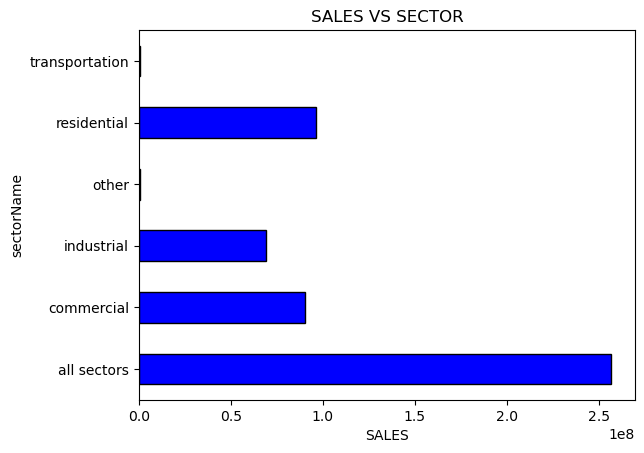

In [1021]:
# Now, Lets check which sector have high sales 
plt.title("SALES VS SECTOR")
df.groupby("sectorName")["sales"].sum().plot(kind='barh',color='b',edgecolor='k')
plt.xlabel("SALES")
plt.show()

In [1022]:
df['sectorName'].unique()

array(['all sectors', 'commercial', 'industrial', 'other', 'residential',
       'transportation'], dtype=object)

In [1023]:
df['sectorName'].nunique()

6

* Since, all sector is the combination of all the sectors. we have to remove the all sector
* there are 5 types of categories

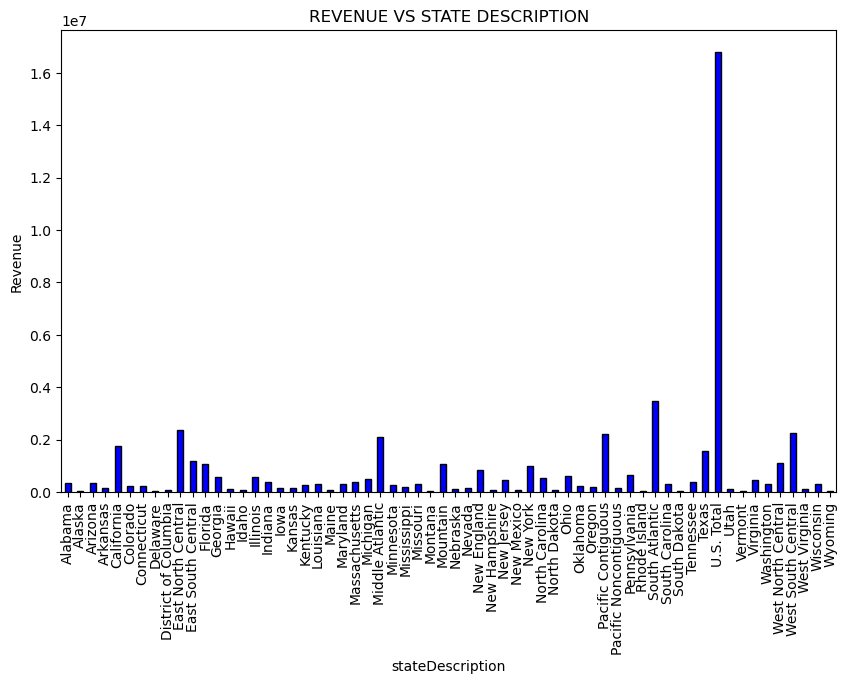

In [1024]:
plt.figure(figsize=(10,6))
plt.title("REVENUE VS STATE DESCRIPTION")
df.groupby("stateDescription")["revenue"].sum().plot(kind='bar',color='b',edgecolor='k')
plt.ylabel("Revenue")
plt.show()

In [1025]:
df['stateDescription'].unique()

array(['Wyoming', 'New England', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Alabama', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Middle Atlantic', 'Pacific Contiguous',
       'Pacific Noncontiguous', 'U.S. Total', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Rhode Island', 'Alaska', 'Arizona', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'East North Central',
       'West North Central', 'South Atlantic', 'East South Central',
       'West South Central', 'Mountain', 'Pennsylvania'], dtype=object)

In [1026]:
df['stateDescription'].nunique()

62

* There are 62 types of categories 

#### CONTINOUS FEATURES 

In [1027]:
df['customers'].describe()

count    5.983000e+04
mean     2.916013e+06
std      1.200567e+07
min      0.000000e+00
25%      4.998000e+03
50%      2.997540e+05
75%      2.028716e+06
max      1.625050e+08
Name: customers, dtype: float64

In [1028]:
df['customers'].corr(df['revenue'])

0.9090085520933515

#### OUTLIER ANALYISIS

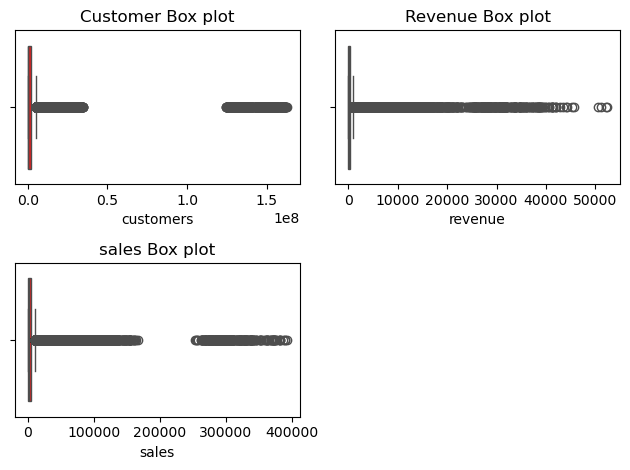

In [1029]:
plt.subplot(2,2,1)
plt.title("Customer Box plot")
sns.boxplot(data = df,x="customers",color='r')
plt.subplot(2,2,2)
plt.title("Revenue Box plot")
sns.boxplot(data = df,x="revenue",color='r')
plt.subplot(2,2,3)
plt.title("sales Box plot")
sns.boxplot(data = df,x="sales",color='r')
plt.tight_layout()
plt.show()

* Majority of the continous features such as sales,revenue,customer have outliers

#### Missing value Handling : Ignoring the tuples with missing value in customer features 

In [1030]:
# Missing value Handling 
df = df[~df['customers'].isna()]

#### encoding the categorical features 
* encoding the categorical features using dictionary 

In [1031]:
# dictionary of sector name 
dict_sector_name = {}
i = 1

for sector in df['sectorName'].unique():
    dict_sector_name[sector] = i
    i += 1

In [1032]:
dict_state_name = {}
i = 1 

for state in df['stateDescription'].unique():
    dict_state_name[state] = i
    i += 1

In [1033]:
# Encoding the categorical features 
df['sectorName'] = df['sectorName'].map(dict_sector_name)
df['stateDescription'] = df['stateDescription'].map(dict_state_name)

* Now the data is very clean 

#### DATA REDUCTION

In [1034]:
df.columns

Index(['year', 'month', 'stateDescription', 'sectorName', 'customers', 'price',
       'revenue', 'sales'],
      dtype='object')

In [1035]:
non_relevant_features = ['year','month',"price"]
df.drop(columns=non_relevant_features,inplace=True)

In [1036]:
X = df.drop(columns=["revenue"])
y = df['revenue']

In [1037]:
# train test split of the dataset 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state=42,shuffle=True)

In [1038]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((46667, 4), (13163, 4), (46667,), (13163,))

#### TRAINING OF THE MODEL

In [1039]:
# Training of the Model using random Forest classifier  
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#### VALIDATION OF THE MODEL

In [1040]:
# r2 score 
r2_score = r2_score(y_pred,y_test)  
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
rmse = mean_squared_error(y_pred,y_test) ** 0.5

In [1041]:
print("R2score : ",r2_score)
print("squared_error: ",mse)
print("mean_absolute_error: ",mae)
print("root mean squared error: ",rmse)

R2score :  0.9977452061560046
squared_error:  14262.93832820341
mean_absolute_error:  30.34866118425208
root mean squared error:  119.42754426095938
